# Time evolution of 2d spin model
2025 Aug. Tsuyoshi Okubo

In this code, you can perform TEBD and PEPS simulation of the ground state of spin model on 2d square lattice.
$$\mathcal{H} = \sum_{\langle i,j\rangle } (J_z S_{i,z}S_{j,z} + J_{xy} (S_{i,x}S_{j,x} + S_{i,y}S_{j,y})) - h_x \sum_i S_{i,x} - h_z \sum_i S_{i,z} + D\sum_i S_{i,z}^2$$

This Hamiltonian can represent several situations. For example, when we set parameters,
* $J_z = -1$, $J_{xy} = 0$, $h_x \neq 0$, and $m = 2$

It represents the transverse field Ising chain (with the open boundary condition).
If you set
* $J_z = J_{xy} = 1$, $h_x = 0$

It represents the $S=(m-1)/2$ Heisenberg model (with the open boundary condition).

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min.


You can change   

- Lx: # of sites along x direction
- Ly: # of sites along y direction
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- hz : amplitude of external field alogn z direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step
- Perform_ED :flag to calculate exact ground state

In [1]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import copy

In [2]:
# Import necessary modules
try:
    import ED
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/ED.py
    import ED
try:
    import TEBD
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/TEBD.py
    import TEBD
try:
    import PEPS_simple as PEPS
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/time-evolution-by-tensor-network/main/notebook/PEPS_simple.py
    import PEPS_simple as PEPS

In [3]:
Lx=3         ## length of x direction
Ly=3         ## length of y direction
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 1.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 8  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step= 2000       ## ITE steps
output_dyn_num = 100 ## output steps


## flag to calculate exact ground state enegy
## Note that for larger N, it is impossible to calculate exact energy
## In that casese, please set this flag False
Perform_ED = True

In [4]:
print("2S = m - 1, N-site spin chain")
print(f"Lx = {Lx}")
print(f"Ly = {Ly}")
print(f"m = {m}")
print("Hamiltonian parameters:")
print(f"Jz = {Jz}")
print(f"Jxy = {Jxy}")
print(f"hx = {hx}")
print(f"hz = {hz}")
print(f"D = {D}")
print(f"chi_max = {chi_max}")
print(f"tau_max = {tau_max}")
print(f"tau_min = {tau_min}")
print(f"T_step = {T_step}")
print(f"output_dyn_num = {output_dyn_num}")
print(f"Perform_ED = {Perform_ED}")

2S = m - 1, N-site spin chain
Lx = 3
Ly = 3
m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 1.5
hz = 0.0
D = 0.0
chi_max = 8
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100
Perform_ED = True


If the system size is small, similar to 1d chains, we can calculate exact ground state.

In [5]:
if Perform_ED:
    ## Obtain the smallest eigenvalue
    eig_val,eig_vec = ED.Calc_GS_2d(m,Jz, Jxy,hx,hz,D,Lx,Ly,k=1)
    Eg = eig_val[0]
    Eg_vec = eig_vec[:,0]
    print(f"Ground state energy = {Eg}")

Ground state energy = -7.018549722722224


We can also calculate the ground state by MPS simulation by mapping a 1D chain to a square lattice.  
Here, we use imaginary-time evolution by the TEBD algorithm.

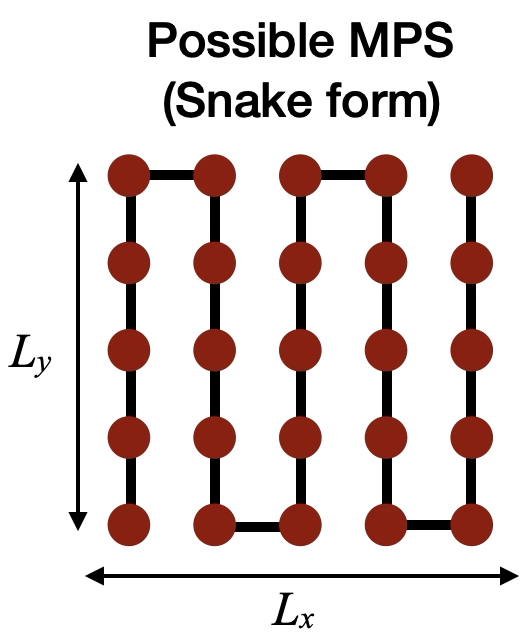

In [6]:
##IT simulation by TEBD
Tn, lam,T_list_IT,E_list_IT,mz_list_IT, S_list = TEBD.TEBD_IT_Simulation_2d(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 3.0 0.05555555555555555 -0.0
##Dyn 1.956898387873087 -7.009342491852429 0.012223994844335277 0.18267692383752843
##Dyn 3.8257218398891855 -7.0174540346273355 0.00256947491893551 0.19403103228685747
##Dyn 5.610434381147543 -7.017575057727074 0.0006513481760756367 0.19386020645662083
##Dyn 7.314821626228748 -7.017660615482046 0.00018013847409809 0.19333783212045905
##Dyn 8.942498808990797 -7.017737463375854 5.3055949211319164e-05 0.19282326673003874
##Dyn 10.49691845096481 -7.0178075132233815 1.6528407865789494e-05 0.1923304070957812
##Dyn 11.981377684616088 -7.017871441582596 5.427991009807842e-06 0.19185903046647335
##Dyn 13.399025247004122 -7.017929789263912 1.8743301992917334e-06 0.19140827443284222
##Dyn 14.752868158676053 -7.017983043794791 6.789704905427939e-07 0.19097727277795454
##Dyn 16.045778101960416 -7.018031649766599 2.5746121459953414e-07 0.19056518981020498
##Dyn 17.280497512190376 -7.0180760130529265 1.0198427608463342e-07 0.19017122179561463
##Dyn 18.459645394

In [7]:
## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy_2d(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly)

if Perform_ED:
    print(f"Ground state energy = {Eg}")
print(f"TEBD energy = {E_mps}")

Ground state energy = -7.018549722722224
TEBD energy = -7.018541903513502


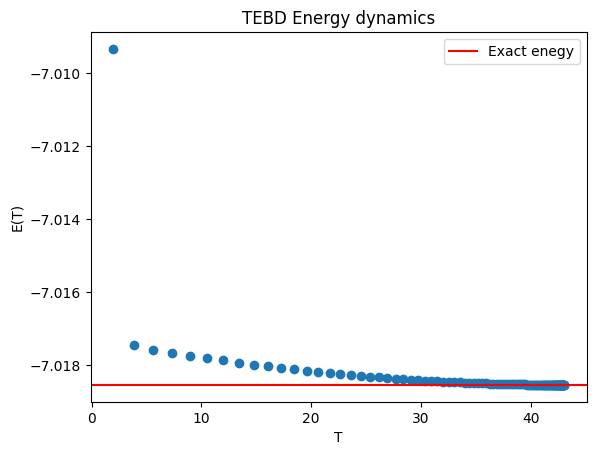

In [8]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list_IT[1:],E_list_IT[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [9]:
Tn_GS = copy.deepcopy(Tn)
lam_GS = copy.deepcopy(lam)

Next we perform real-time simulation.  
If the system size is small, we can do by the eixact digonalization.

In [10]:
## paramters for Time evolution
T_max = 20.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for TEBD
dt = 0.01 ## time step for TEBD
t_step = int(T_max / dt)
chi_max = 8

## for ED
dt_ED = 0.5 ## time step for ED

t = 0.0, energy = -7.018549722722229, mz = 2.6645352591003757e-15
t = 0.5, energy = -7.018549722722224, mz = 0.7745892719976628
t = 1.0, energy = -7.018549722722223, mz = 2.6609315105065794
t = 1.5, energy = -7.0185497227222235, mz = 4.1293181312653875
t = 2.0, energy = -7.018549722722223, mz = 3.570536276415115
t = 2.5, energy = -7.018549722722228, mz = 1.779793292449606
t = 3.0, energy = -7.01854972272222, mz = 0.6803000693819069
t = 3.5, energy = -7.018549722722215, mz = 0.851207693756585
t = 4.0, energy = -7.0185497227222156, mz = 2.0347510030995193
t = 4.5, energy = -7.018549722722216, mz = 3.362225142711619
t = 5.0, energy = -7.018549722722216, mz = 3.568870553393274
t = 5.5, energy = -7.018549722722209, mz = 2.5386204073036014
t = 6.0, energy = -7.01854972272221, mz = 1.5147789914066077
t = 6.5, energy = -7.018549722722209, mz = 1.3260013090345082
t = 7.0, energy = -7.018549722722205, mz = 1.9462676253727462
t = 7.5, energy = -7.018549722722199, mz = 2.862766285702418
t = 8.0, e

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


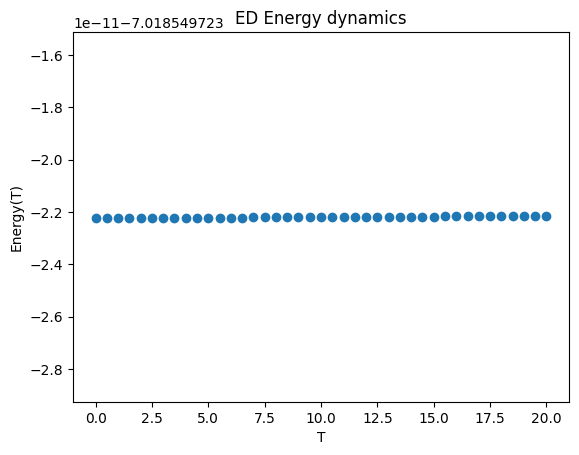

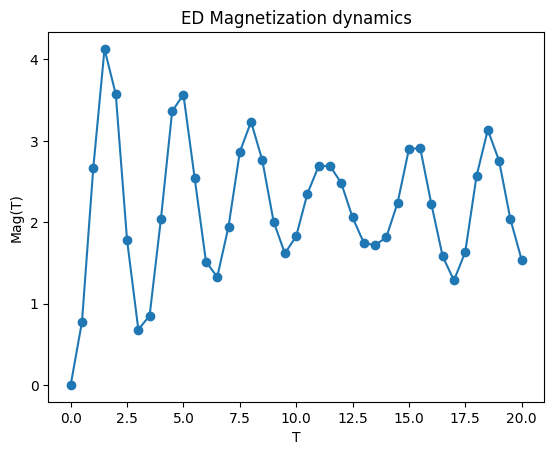

In [11]:
if Perform_ED:
    ## Perfrom real time evolution
    ## Time evolution from the ground state
    initv = Eg_vec.copy()  ## initial state is the ground state
    E_list_ED = []
    mz_list_ED = []
    T_list_ED = np.arange(0, T_max, dt_ED)  ## time points to evaluate
    vecs = initv
    mz_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx,Ly).mult_total_Sz(vecs))
    E_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx,Ly).mult_Hamiltonian(vecs))
    mz_list_ED.append(mz_temp)
    E_list_ED.append(E_temp)
    t = 0.0
    print(f"t = {t}, energy = {E_temp.real}, mz = {mz_temp.real}")


    for t in T_list_ED:
        vecs = ED.Calc_TE_2d(initv, m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly,dt_ED)
        mz_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly).mult_total_Sz(vecs))
        E_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly).mult_Hamiltonian(vecs))
        norm = np.linalg.norm(vecs)
        mz_list_ED.append(mz_temp/norm**2)
        E_list_ED.append(E_temp/norm**2)
        print(f"t = {t+dt_ED}, energy = {E_temp.real/norm**2}, mz = {mz_temp.real/norm**2}")
        initv = vecs/norm
    T_list_ED = list(T_list_ED) + [T_list_ED[-1] + dt_ED]  # Adjust the time list to match the output

    ## plot energy dynamics

    #print(T_list_ED)
    pyplot.title("ED Energy dynamics")
    pyplot.plot(T_list_ED,E_list_ED,"o")
    pyplot.xlabel("T")
    pyplot.ylabel("Energy(T)")
    pyplot.show()

    ## plot total magnetization dynamics
    pyplot.title("ED Magnetization dynamics")
    pyplot.plot(T_list_ED,mz_list_ED,"-o")
    pyplot.xlabel("T")
    pyplot.ylabel("Mag(T)")
    pyplot.show()


Next, we perform real-time simulation by TEBD algorithm.

In [12]:
## Real time simulation
Tn, lam,T_list,E_list,mz_list,S_list = TEBD.TEBD_RT_Simulation_2d(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max,dt, t_step, Tn_GS, lam_GS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -7.0185419035282575 1.6394525848155559e-12 0.1818634381646832
##Dyn 0.2 -7.018539817708714 0.014227676449937394 0.1822845014407882
##Dyn 0.4 -7.0185300448846535 0.05588815931616567 0.1845053201779407
##Dyn 0.6 -7.018518442539479 0.12162225962949841 0.1910434456210828
##Dyn 0.8 -7.018511612875082 0.20498118148945352 0.2028400970126237
##Dyn 1.0 -7.018512414326059 0.2956611077851565 0.2170802577430379
##Dyn 1.2 -7.018517801764713 0.37960250540357704 0.22975710533173402
##Dyn 1.4000000000000001 -7.018521552698018 0.44099224472355814 0.2397802725510382
##Dyn 1.6 -7.018519780051429 0.46647886332285066 0.24681958426800096
##Dyn 1.8 -7.0185150432766115 0.45019828809012413 0.24389672727822875
##Dyn 2.0 -7.018514901384398 0.3967348765948812 0.22059301099218245
##Dyn 2.2 -7.018523199517302 0.3197291012763265 0.18303636821638694
##Dyn 2.4 -7.01853746406229 0.23663154094499728 0.16578272677645053
##Dyn 2.6 -7.018552920092313 0.1627387472747542 0.20504962909431187
##Dyn 2.8000000000000003

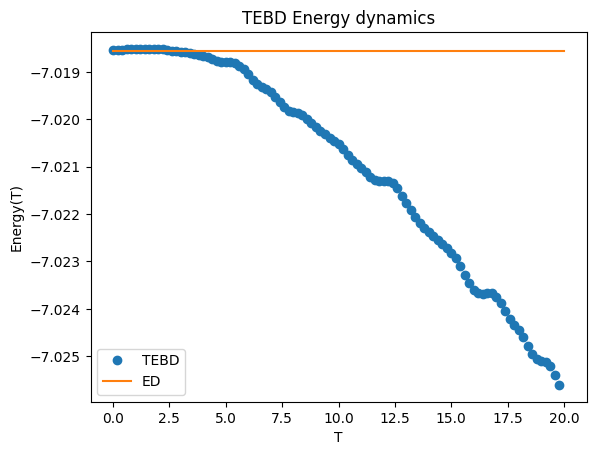

In [13]:
## plot energy dynamics

#print(T_list_ED)
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list,E_list,"o", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


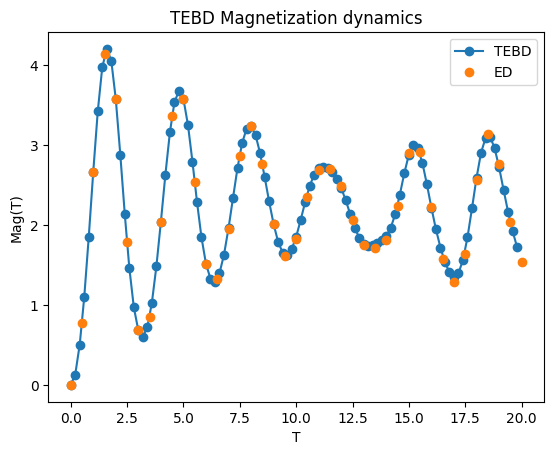

In [14]:
## plot total mag dynamics
total_mag = []
for i in range(len(E_list)):
    mag = np.sum(mz_list[i])
    total_mag.append(mag)

pyplot.title("TEBD Magnetization dynamics")
pyplot.plot(T_list,total_mag,"o-", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


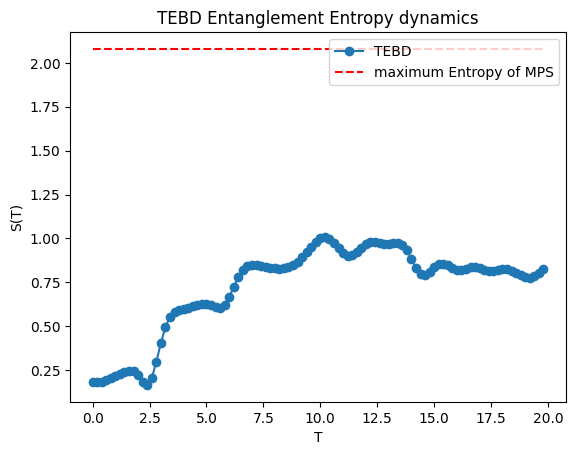

In [15]:
## plot Entropy

pyplot.title("TEBD Entanglement Entropy dynamics")
pyplot.plot(T_list,S_list,"o-", label="TEBD")
pyplot.hlines(np.log(chi_max),T_list[0], T_list[-1], colors='red', linestyles='dashed', label='maximum Entropy of MPS')
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()


## PEPS simulation  
We can investigate real-time evolution using different tensor network, called TPS(PEPS).  
Here we try to perform simulation by simple-update, which is a generalization of TEBD to PEPS.  

In [16]:
chi_max_peps = 4  ## maxmum bond dimension at truncation

tau_max_peps = 0.01    ## start imaginary time tau
tau_min_peps = 0.005   ## final imaginary time tau
T_step_peps = 2000       ## ITE steps
output_dyn_num_peps = 100 ## output steps
second_ST = False #True ## calculate second order Suzuki-Trotter expansion

In [17]:
##IT simulation by PEPS
Tn, lam,T_list_peps,E_list_peps,mz_list_peps = PEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max_peps,tau_max_peps,tau_min_peps,T_step_peps,second_ST= second_ST, output_dyn=True,output_dyn_num=output_dyn_num_peps)

##Dyn 0.0 3.0 0.05555555555555555
##Dyn 0.19934299107590414 0.45272317484925484 0.053217749465694374
##Dyn 0.3973090195313565 -2.585945020338214 0.04764831496122151
##Dyn 0.5939075967419407 -4.8456682295896565 0.04122674182959915
##Dyn 0.7891481683833703 -6.034295506848343 0.03516659660606593
##Dyn 0.9830401148853111 -6.57590516324846 0.029759988103421793
##Dyn 1.1755927518820675 -6.813636418842735 0.02506178033036699
##Dyn 1.3668153306601574 -6.917928694549473 0.021068175076549955
##Dyn 1.5567170386027962 -6.96417195516695 0.01772676332204118
##Dyn 1.7453069996313064 -6.984966762476787 0.014954939852445562
##Dyn 1.9325942746434834 -6.9944649337366025 0.01266217806979605
##Dyn 2.118587861948928 -6.99887877983792 0.010763946980929938
##Dyn 2.3032966977013785 -7.000970960019574 0.00918743598642744
##Dyn 2.4867296563280488 -7.001986647560509 0.007872504549294728
##Dyn 2.668895550956007 -7.00249485108898 0.006770512701530843
##Dyn 2.8498031338356062 -7.0027593668794665 0.005842485417829771

In [18]:
## Calculate Energy
E_peps = PEPS.Calc_Energy(Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly)

if Perform_ED:
    print(f"Ground state energy = {Eg}")
print(f"MPS energy = {E_mps}")
print(f"PEPS energy = {E_peps}")

Ground state energy = -7.018549722722224
MPS energy = -7.018541903513502
PEPS energy = -7.003956211055692


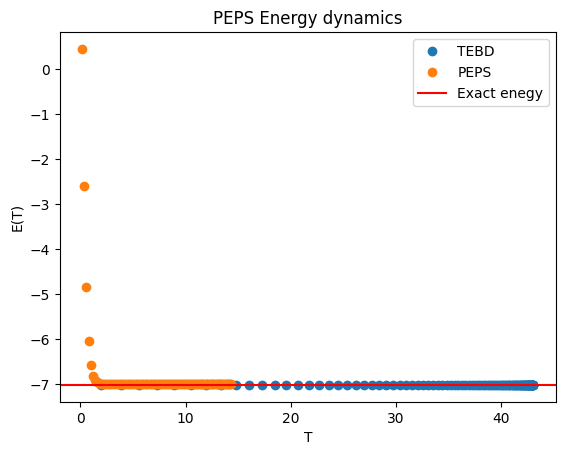

In [19]:
## plot energy dynamics
pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list_IT[1:],E_list_IT[1:],"o", label="TEBD")
pyplot.plot(T_list_peps[1:],E_list_peps[1:],"o", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [20]:
Tn_GS_PEPS = copy.deepcopy(Tn)
lam_GS_PEPS = copy.deepcopy(lam)

Next we perform real-time simulation by PEPS.

In [22]:
## paramters for Time evolution
T_max = T_max ## maximum time for real-time evolution


hx_new = hx_new ## new external field along x direction
hz_new = hz_new ## new external field along z direction

## for PEPS
dt_peps = 0.01 ## time step for TEBD
t_step_peps = int(T_max / dt_peps)
chi_max_peps = 4



In [23]:
## Real time simulation by PEPS
Tn, lam,T_list_peps_RT,E_list_peps_RT,mz_list_peps_RT = PEPS.simple_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max_peps,dt_peps, t_step_peps, Tn_GS_PEPS, lam_GS_PEPS,second_ST=True,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -7.003966722301646 1.4136956073293213e-12
##Dyn 0.2 -7.00505794525303 0.00020536231349241205
##Dyn 0.4 -7.005057900313296 0.003171351409197647
##Dyn 0.6 -7.005057576567032 0.015040271127996826
##Dyn 0.8 -7.005056812807167 0.04279912963319979
##Dyn 1.0 -7.005055689008203 0.089201304926273
##Dyn 1.2 -7.005054544373685 0.14723206121935162
##Dyn 1.4000000000000001 -7.005053772214314 0.19876142525680343
##Dyn 1.6 -7.005053598118192 0.22217283568074303
##Dyn 1.8 -7.005054027994655 0.20645233368084823
##Dyn 2.0 -7.005054847396067 0.15970415976465177
##Dyn 2.2 -7.005055927465395 0.1029162382659169
##Dyn 2.4 -7.005057112015053 0.055325056276802696
##Dyn 2.6 -7.005058028033216 0.02521686526849172
##Dyn 2.8000000000000003 -7.00505837815135 0.010893267283953643
##Dyn 3.0 -7.005058256498298 0.006462440188182066
##Dyn 3.2 -7.00505827994399 0.0067396437738124135
##Dyn 3.4 -7.005059117738003 0.00958003804467019
##Dyn 3.6 -7.005062538221654 0.016276965926438947
##Dyn 3.8000000000000003 -7.005

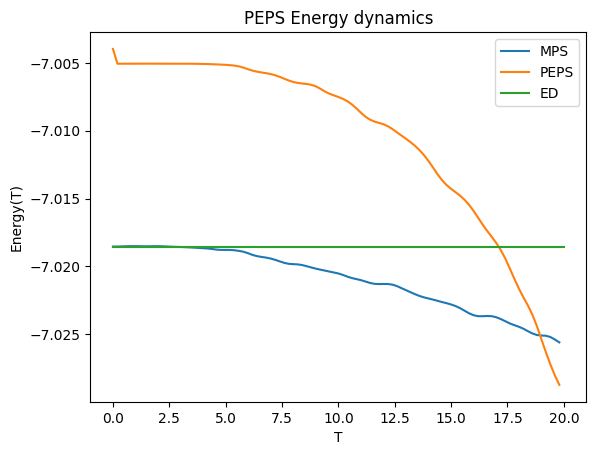

In [24]:
## plot energy dynamics

pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list,E_list,"-", label="MPS")
pyplot.plot(T_list_peps_RT,E_list_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


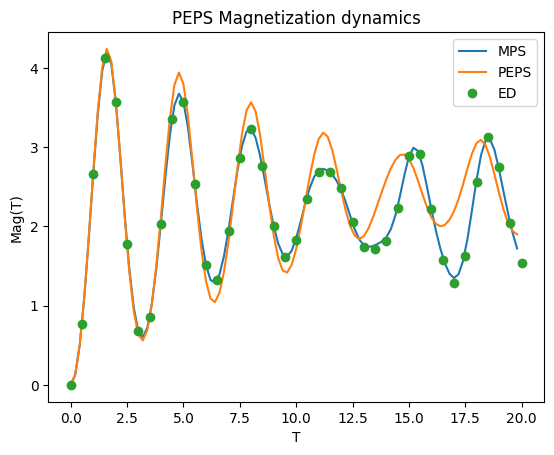

In [25]:
## plot total mag dynamics
total_mag_peps_RT = []
for i in range(len(E_list_peps_RT)):
    mag = np.sum(mz_list_peps_RT[i])
    total_mag_peps_RT.append(mag)

pyplot.title("PEPS Magnetization dynamics")
pyplot.plot(T_list,total_mag,"-", label="MPS")
pyplot.plot(T_list_peps_RT,total_mag_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


## Exercise 2-1: Larger size simulation  
MPS simulation is expected to become difficult for larger Ly.  
Here, please try   
- Ly = 6, Lx = 3

simultion!

Note that we need much longer time to simulate larger Ly, so it is better to use shorter T_max, such as T_max = 10. Also, for real time evlution, it is heavy to performm ED. If you cannot wait,
 please set

- Perform_ED = False

in the real time evolution section.

In [26]:
Lx=3         ## length of x direction
Ly=6        ## length of y direction
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 1.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 8  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step= 1000       ## ITE steps
output_dyn_num = 100 ## output steps


## flag to calculate exact ground state enegy
## Note that for larger N, it is impossible to calculate exact energy
## In that casese, please set this flag False
Perform_ED = True

In [27]:
print("2S = m - 1, N-site spin chain")
print(f"Lx = {Lx}")
print(f"Ly = {Ly}")
print(f"m = {m}")
print("Hamiltonian parameters:")
print(f"Jz = {Jz}")
print(f"Jxy = {Jxy}")
print(f"hx = {hx}")
print(f"hz = {hz}")
print(f"D = {D}")
print(f"chi_max = {chi_max}")
print(f"tau_max = {tau_max}")
print(f"tau_min = {tau_min}")
print(f"T_step = {T_step}")
print(f"output_dyn_num = {output_dyn_num}")
print(f"Perform_ED = {Perform_ED}")

2S = m - 1, N-site spin chain
Lx = 3
Ly = 6
m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 1.5
hz = 0.0
D = 0.0
chi_max = 8
tau_max = 0.1
tau_min = 0.001
T_step = 1000
output_dyn_num = 100
Perform_ED = True


If the system size is small, similar to 1d chains, we can calculate exact ground state.

In [28]:
if Perform_ED:
    ## Obtain the smallest eigenvalue
    eig_val,eig_vec = ED.Calc_GS_2d(m,Jz, Jxy,hx,hz,D,Lx,Ly,k=1)
    Eg = eig_val[0]
    Eg_vec = eig_vec[:,0]
    print(f"Ground state energy = {Eg}")

Ground state energy = -14.113796738494251


In [29]:
##IT simulation by TEBD
Tn, lam,T_list_IT,E_list_IT,mz_list_IT, S_list = TEBD.TEBD_IT_Simulation_2d(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 6.75 0.0 -0.0
##Dyn 0.9795756747029418 -13.273698689722943 -5.5499566643370096e-06 0.19433969112393903
##Dyn 1.9150631814911976 -14.079553277826438 -1.197627611911249e-05 0.30249770731981485
##Dyn 2.8084468147896597 -14.09443255730831 -9.260006412974113e-06 0.3194629629396824
##Dyn 3.6616215610625846 -14.095080424748499 -6.123936055791109e-06 0.32274243702881
##Dyn 4.4763971183339475 -14.095276824836033 -3.9834136824100666e-06 0.3230360631469611
##Dyn 5.254501734799583 -14.095432311640797 -2.619692958321094e-06 0.32259056245458456
##Dyn 5.997585874673318 -14.09557139689808 -1.7514107308315613e-06 0.32196036131761474
##Dyn 6.707225719042852 -14.095697716083745 -1.1913657671799201e-06 0.3212957879202836
##Dyn 7.384926509161163 -14.095812765446968 -8.24340598818256e-07 0.32064027772463094
##Dyn 8.032125739265018 -14.09591762515996 -5.798531755343852e-07 0.32000665778545734
##Dyn 8.650196205692978 -14.096013218804615 -4.143677574364234e-07 0.3193984017231699
##Dyn 9.2404489187704

In [30]:
## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy_2d(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly)

if Perform_ED:
    print(f"Ground state energy = {Eg}")
print(f"TEBD energy = {E_mps}")

Ground state energy = -14.113796738494251
TEBD energy = -14.097002247153556


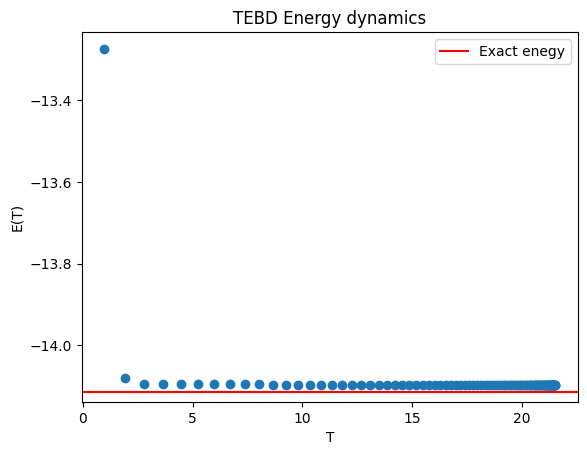

In [31]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list_IT[1:],E_list_IT[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [32]:
Tn_GS = copy.deepcopy(Tn)
lam_GS = copy.deepcopy(lam)

Next we perform real-time simulation.  
If the system size is small, we can do by the eixact digonalization.

In [33]:
## paramters for Time evolution
T_max = 10.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for TEBD
dt = 0.05 ## time step for TEBD
t_step = int(T_max / dt)
chi_max = 8

## for ED
dt_ED = 2.0 ## time step for ED
Perform_ED = False

In [34]:
if Perform_ED:
    ## Perfrom real time evolution
    ## Time evolution from the ground state
    initv = Eg_vec.copy()  ## initial state is the ground state
    E_list_ED = []
    mz_list_ED = []
    T_list_ED = np.arange(0, T_max, dt_ED)  ## time points to evaluate
    vecs = initv
    mz_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx,Ly).mult_total_Sz(vecs))
    E_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx,Ly).mult_Hamiltonian(vecs))
    mz_list_ED.append(mz_temp)
    E_list_ED.append(E_temp)
    t = 0.0
    print(f"t = {t}, energy = {E_temp.real}, mz = {mz_temp.real}")


    for t in T_list_ED:
        vecs = ED.Calc_TE_2d(initv, m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly,dt_ED)
        mz_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly).mult_total_Sz(vecs))
        E_temp = np.vdot(vecs,ED.Hamiltonian_2d(m,Jz,Jxy,hx_new, hz_new,D,Lx, Ly).mult_Hamiltonian(vecs))
        norm = np.linalg.norm(vecs)
        mz_list_ED.append(mz_temp/norm**2)
        E_list_ED.append(E_temp/norm**2)
        print(f"t = {t+dt_ED}, energy = {E_temp.real/norm**2}, mz = {mz_temp.real/norm**2}")
        initv = vecs/norm
    T_list_ED = list(T_list_ED) + [T_list_ED[-1] + dt_ED]  # Adjust the time list to match the output

    ## plot energy dynamics

    #print(T_list_ED)
    pyplot.title("ED Energy dynamics")
    pyplot.plot(T_list_ED,E_list_ED,"o")
    pyplot.xlabel("T")
    pyplot.ylabel("Energy(T)")
    pyplot.show()

    ## plot total magnetization dynamics
    pyplot.title("ED Magnetization dynamics")
    pyplot.plot(T_list_ED,mz_list_ED,"-o")
    pyplot.xlabel("T")
    pyplot.ylabel("Mag(T)")
    pyplot.show()


Next, we perform real-time simulation by TEBD algorithm.

In [35]:
## Real time simulation
Tn, lam,T_list,E_list,mz_list,S_list = TEBD.TEBD_RT_Simulation_2d(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max,dt, t_step, Tn_GS, lam_GS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -14.097002240702203 -3.584085127675456e-10 0.30652905575706924
##Dyn 0.1 -14.096946885502451 0.0035535734554570783 0.30946262728684365
##Dyn 0.2 -14.09676494547542 0.014160746919890424 0.3126543311877779
##Dyn 0.30000000000000004 -14.096496232716195 0.03165322807612811 0.315813710234677
##Dyn 0.4 -14.096204329630492 0.055730517972934185 0.31931379647877106
##Dyn 0.5 -14.095963964702047 0.08593275949502027 0.32368236579479154
##Dyn 0.6000000000000001 -14.095848737661054 0.12160540702489674 0.3294235921553528
##Dyn 0.7000000000000001 -14.095916173983177 0.16185980499852276 0.33683833969597954
##Dyn 0.8 -14.096192650764914 0.20553649201523894 0.34590843216054046
##Dyn 0.9 -14.096661468131323 0.25118117051850003 0.35630219257944273
##Dyn 1.0 -14.09725886412701 0.29704596502060754 0.36751220336827606
##Dyn 1.1 -14.097883248920116 0.3411294963391656 0.3790638847778155
##Dyn 1.2000000000000002 -14.098419873765192 0.3812668153555097 0.3906708498773146
##Dyn 1.3 -14.098775998006623 0.

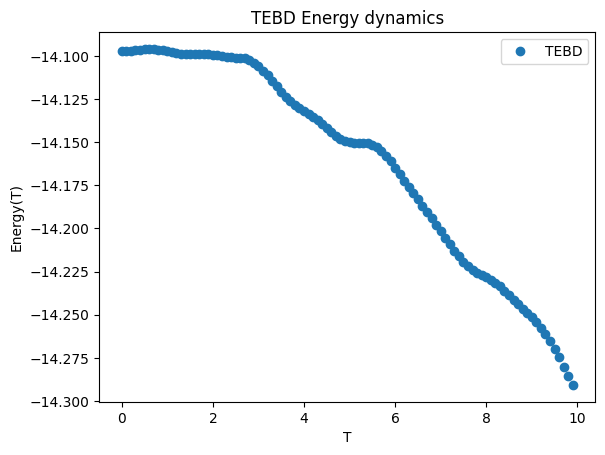

In [36]:
## plot energy dynamics

#print(T_list_ED)
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list,E_list,"o", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


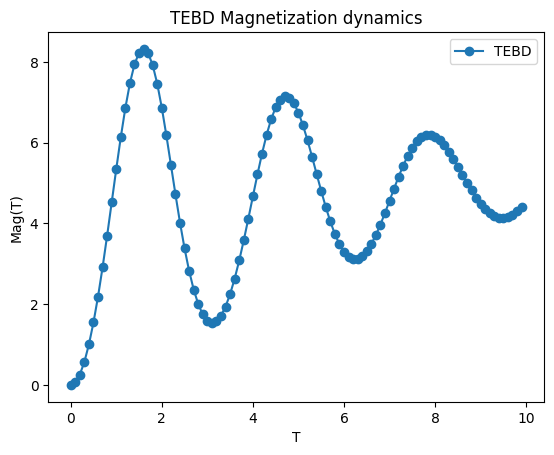

In [37]:
## plot total mag dynamics
total_mag = []
for i in range(len(E_list)):
    mag = np.sum(mz_list[i])
    total_mag.append(mag)

pyplot.title("TEBD Magnetization dynamics")
pyplot.plot(T_list,total_mag,"o-", label="TEBD")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


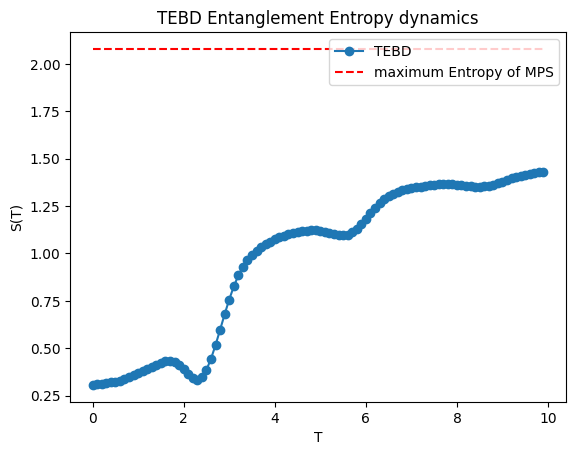

In [38]:
## plot Entropy

pyplot.title("TEBD Entanglement Entropy dynamics")
pyplot.plot(T_list,S_list,"o-", label="TEBD")
pyplot.hlines(np.log(chi_max),T_list[0], T_list[-1], colors='red', linestyles='dashed', label='maximum Entropy of MPS')
pyplot.xlabel("T")
pyplot.ylabel("S(T)")
pyplot.legend()
pyplot.show()


### PEPS simulation  
We can investigate real-time evolution using different tensor network, called TPS(PEPS).  

**Here we try to perform simulation by simple-update method, which is a generalization of TEBD to PEPS.  Note that, for PEPS, the simple-update method is not globally optimal.**  

**To reduce the computation cost, in this notebook, the physical quantities are evaluated by the mena-field environment. This introduce a (large) approximation in the expectation values.**


In [39]:
chi_max_peps = 4  ## maxmum bond dimension at truncation

tau_max_peps = 0.01    ## start imaginary time tau
tau_min_peps = 0.005   ## final imaginary time tau
T_step_peps = 2000       ## ITE steps
output_dyn_num_peps = 100 ## output steps
second_ST = False #True ## calculate second order Suzuki-Trotter expansion

## for plot
Perform_ED = True

In [40]:
##IT simulation by PEPS
Tn, lam,T_list_peps,E_list_peps,mz_list_peps = PEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max_peps,tau_max_peps,tau_min_peps,T_step_peps,second_ST = second_ST, output_dyn=True,output_dyn_num=output_dyn_num_peps)

##Dyn 0.0 6.75 0.0
##Dyn 0.19934299107590414 1.4825048524032907 1.2027416100105863e-15
##Dyn 0.3973090195313565 -5.021141240848522 2.7755575615628914e-15
##Dyn 0.5939075967419407 -9.78807080830062 4.3637932773461016e-15
##Dyn 0.7891481683833703 -12.207072972993785 3.659110051993745e-15
##Dyn 0.9830401148853111 -13.272580264630404 4.1772141301521515e-15
##Dyn 1.1755927518820675 -13.726909590240826 4.199572788286963e-15
##Dyn 1.3668153306601574 -13.921079877314575 4.164878318767427e-15
##Dyn 1.5567170386027962 -14.005042598922001 4.504884120058881e-15
##Dyn 1.7453069996313064 -14.041862937866387 4.273587656595308e-15
##Dyn 1.9325942746434834 -14.058251672498107 2.0818609182250548e-15
##Dyn 2.118587861948928 -14.065663662100054 2.0174834025610267e-15
##Dyn 2.3032966977013785 -14.0690770579538 3.3189115036494045e-15
##Dyn 2.4867296563280488 -14.070684114865953 4.6866445909306736e-15
##Dyn 2.668895550956007 -14.071463096882947 5.105676683905516e-15
##Dyn 2.8498031338356062 -14.0718564694688

In [41]:
## Calculate Energy
E_peps = PEPS.Calc_Energy(Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly)

if Perform_ED:
  print(f"Ground state energy = {Eg}")
print(f"MPS energy = {E_mps}")
print(f"PEPS energy = {E_peps}")

Ground state energy = -14.113796738494251
MPS energy = -14.097002247153556
PEPS energy = -14.074328812370446


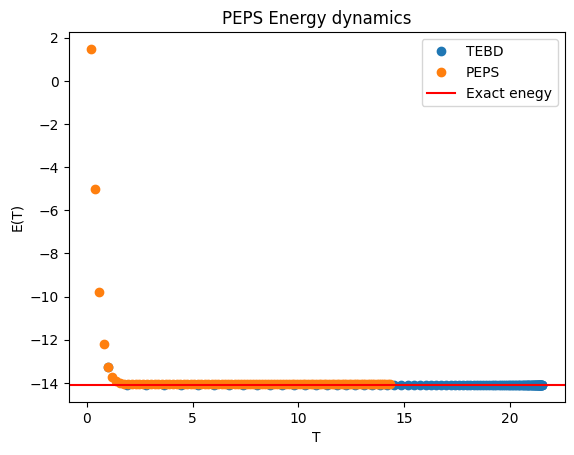

In [42]:
## plot energy dynamics
pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list_IT[1:],E_list_IT[1:],"o", label="TEBD")
pyplot.plot(T_list_peps[1:],E_list_peps[1:],"o", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()


In [43]:
Tn_GS_PEPS = copy.deepcopy(Tn)
lam_GS_PEPS = copy.deepcopy(lam)

Next we perform real-time simulation by PEPS.

In [44]:
## paramters for Time evolution
T_max = T_max ## maximum time for real-time evolution


hx_new = hx_new ## new external field along x direction
hz_new = hz_new ## new external field along z direction

## for PEPS
dt_peps = 0.05 ## time step for TEBD
t_step_peps = int(T_max / dt_peps)
chi_max_peps = 4

## for plot
Perform_ED = False

In [45]:
## Real time simulation by PEPS
Tn, lam,T_list_peps_RT,E_list_peps_RT,mz_list_peps_RT = PEPS.simple_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max_peps,dt_peps, t_step_peps, Tn_GS_PEPS, lam_GS_PEPS,second_ST=True,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -14.074328812370041 3.527233466579283e-14
##Dyn 0.1 -14.076926028007053 1.2791113206590767e-05
##Dyn 0.2 -14.076924760178033 0.00020312928928748204
##Dyn 0.30000000000000004 -14.076921453487321 0.0010151330631315166
##Dyn 0.4 -14.076914758697113 0.0031478799320573004
##Dyn 0.5 -14.076903144354128 0.0074876539432362325
##Dyn 0.6000000000000001 -14.076885349257237 0.015002803834535958
##Dyn 0.7000000000000001 -14.076860800941539 0.026595851348556673
##Dyn 0.8 -14.07682998126566 0.042914076464032495
##Dyn 0.9 -14.07679456876755 0.06413307113191155
##Dyn 1.0 -14.076757327411004 0.08974730398693538
##Dyn 1.1 -14.076721706509579 0.11842318390109846
##Dyn 1.2000000000000002 -14.076691168697195 0.1479837561732331
##Dyn 1.3 -14.076668434349834 0.17558656731379224
##Dyn 1.4000000000000001 -14.076654914753826 0.1981164319455497
##Dyn 1.5 -14.076650642259692 0.21274432662225787
##Dyn 1.6 -14.076654522681908 0.2175242673846648
##Dyn 1.7000000000000002 -14.076664575405927 0.211850783065283

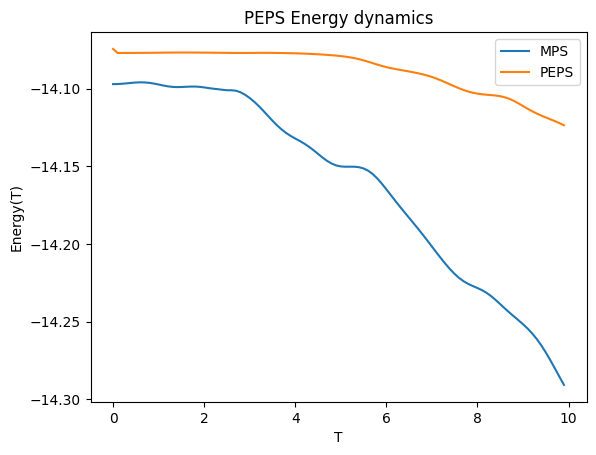

In [46]:
## plot energy dynamics

pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list,E_list,"-", label="MPS")
pyplot.plot(T_list_peps_RT,E_list_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
if Perform_ED:
     pyplot.plot(T_list_ED,E_list_ED,label="ED")
pyplot.legend()
pyplot.show()


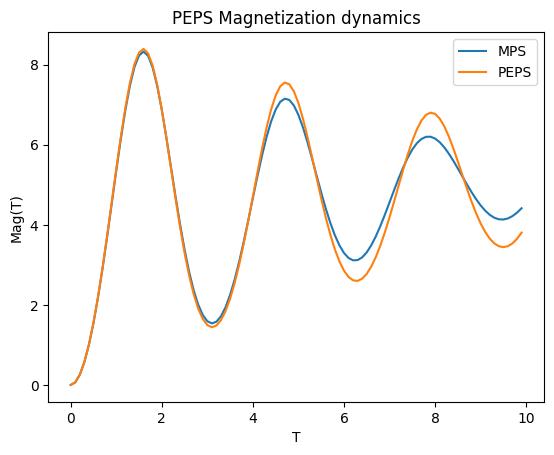

In [47]:
## plot total mag dynamics
total_mag_peps_RT = []
for i in range(len(E_list_peps_RT)):
    mag = np.sum(mz_list_peps_RT[i])
    total_mag_peps_RT.append(mag)

pyplot.title("PEPS Magnetization dynamics")
pyplot.plot(T_list,total_mag,"-", label="MPS")
pyplot.plot(T_list_peps_RT,total_mag_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
if Perform_ED:
    pyplot.plot(T_list_ED,mz_list_ED,"o", label="ED")
pyplot.legend()
pyplot.show()


## Larger-size simulation by PEPS

In [48]:
Lx=10         ## length of x direction
Ly=10         ## length of y direction
m = 2         ## m = 2S + 1, e.g. m=3 for S=1
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 1.5      ## external field along x direction
hz = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary


chi_max_peps = 4  ## maxmum bond dimension at truncation

tau_max_peps = 0.01    ## start imaginary time tau
tau_min_peps = 0.005   ## final imaginary time tau
T_step_peps = 2000       ## ITE steps
output_dyn_num_peps = 100 ## output steps
second_ST = False #True ## calculate second order Suzuki-Trotter expansion

In [49]:
print("2S = m - 1, N-site spin chain")
print(f"Lx = {Lx}")
print(f"Ly = {Ly}")
print(f"m = {m}")
print("Hamiltonian parameters:")
print(f"Jz = {Jz}")
print(f"Jxy = {Jxy}")
print(f"hx = {hx}")
print(f"hz = {hz}")
print(f"D = {D}")
print(f"chi_max = {chi_max_peps}")
print(f"tau_max = {tau_max_peps}")
print(f"tau_min = {tau_min_peps}")
print(f"T_step = {T_step_peps}")
print(f"output_dyn_num = {output_dyn_num_peps}")


2S = m - 1, N-site spin chain
Lx = 10
Ly = 10
m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 1.5
hz = 0.0
D = 0.0
chi_max = 4
tau_max = 0.01
tau_min = 0.005
T_step = 2000
output_dyn_num = 100


In [50]:
##IT simulation by PEPS
Tn, lam,T_list_peps,E_list_peps,mz_list_peps = PEPS.simple_IT_Simulation(m,Jz,Jxy,hx,hz,D,Lx, Ly,chi_max_peps,tau_max_peps,tau_min_peps,T_step_peps,second_ST = False, output_dyn=True,output_dyn_num=output_dyn_num_peps)

##Dyn 0.0 45.0 0.0
##Dyn 0.19934299107590414 13.931279630044841 1.023348072948238e-13
##Dyn 0.3973090195313565 -26.659965737366562 2.4564721368136588e-11
##Dyn 0.5939075967419407 -55.51422206288667 2.2724584269884218e-10
##Dyn 0.7891481683833703 -69.23317161238903 2.6419381154996205e-10
##Dyn 0.9830401148853111 -74.92533238534647 -2.575385771308447e-10
##Dyn 1.1755927518820675 -77.23177062618544 -8.876050983097628e-10
##Dyn 1.3668153306601574 -78.17293877533885 -1.3261856977864194e-09
##Dyn 1.5567170386027962 -78.56225288987063 -1.56479743704252e-09
##Dyn 1.7453069996313064 -78.72564333101084 -1.6711205640118631e-09
##Dyn 1.9325942746434834 -78.79523784052707 -1.7004756111202445e-09
##Dyn 2.118587861948928 -78.82535967442327 -1.6855674018004252e-09
##Dyn 2.3032966977013785 -78.83864952941944 -1.644024987170617e-09
##Dyn 2.4867296563280488 -78.84466652088713 -1.5854528580966366e-09
##Dyn 2.668895550956007 -78.84749806523455 -1.5155227693283702e-09
##Dyn 2.8498031338356062 -78.8489144138

In [51]:
## Calculate Energy
E_peps = PEPS.Calc_Energy(Tn,lam,Jz,Jxy,hx,hz,D,Lx,Ly)
print(f"PEPS energy = {E_peps}")

PEPS energy = -78.86484712165729


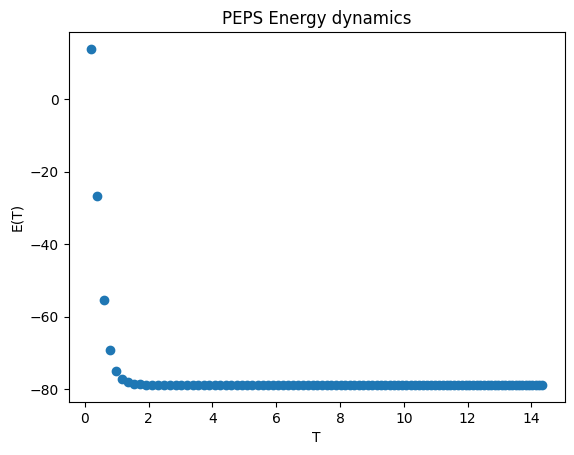

In [52]:
## plot energy dynamics
pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list_peps[1:],E_list_peps[1:],"o", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
pyplot.show()


In [53]:
Tn_GS_PEPS = copy.deepcopy(Tn)
lam_GS_PEPS = copy.deepcopy(lam)

Next we perform real-time simulation by PEPS.

In [54]:
## paramters for Time evolution
T_max = 10.0 ## maximum time for real-time evolution


hx_new = hx ## new external field along x direction
hz_new = 1.0 ## new external field along z direction

## for PEPS
dt_peps = 0.05 ## time step for TEBD
t_step_peps = int(T_max / dt_peps)
chi_max_peps = 4


In [55]:
## Real time simulation by PEPS
Tn, lam,T_list_peps_RT,E_list_peps_RT,mz_list_peps_RT = PEPS.simple_RT_Simulation(m,Jz,Jxy,hx_new,hz_new,D,Lx,Ly,chi_max_peps,dt_peps, t_step_peps, Tn_GS_PEPS, lam_GS_PEPS,second_ST=False,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -78.86484747758237 1.3086156549399334e-11
##Dyn 0.1 -78.88308123447725 1.2505411320413456e-05
##Dyn 0.2 -78.88172846371498 0.00019890184738210348
##Dyn 0.30000000000000004 -78.87942663351245 0.000996520414596564
##Dyn 0.4 -78.87653923258708 0.0031006072985868484
##Dyn 0.5 -78.87349981221413 0.007405084266494817
##Dyn 0.6000000000000001 -78.87076118665885 0.014903649330718399
##Dyn 0.7000000000000001 -78.86871755050355 0.0265401693956991
##Dyn 0.8 -78.86762899609982 0.04300369775925943
##Dyn 0.9 -78.86756289877152 0.06447963994589724
##Dyn 1.0 -78.86837034121952 0.09039579558266929
##Dyn 1.1 -78.86971245327996 0.11923541682835967
##Dyn 1.2000000000000002 -78.87113961347352 0.14851463262694228
##Dyn 1.3 -78.87221134170875 0.17501549791812707
##Dyn 1.4000000000000001 -78.87262649654724 0.19530715401659396
##Dyn 1.5 -78.87232369483677 0.20647633153779876
##Dyn 1.6 -78.87150823301042 0.20686414919491447
##Dyn 1.7000000000000002 -78.87056506034126 0.1965417485781704
##Dyn 1.8 -78.8

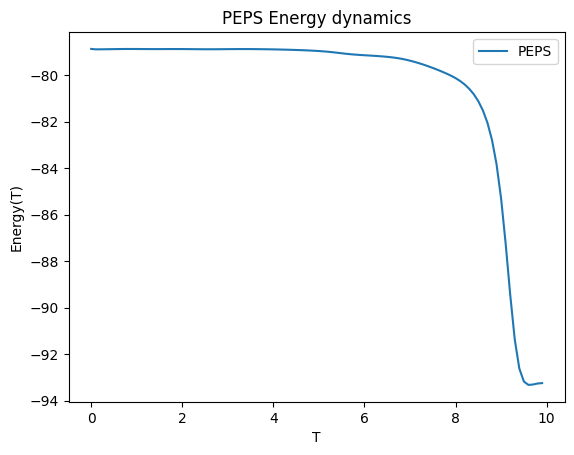

In [56]:
## plot energy dynamics

pyplot.title("PEPS Energy dynamics")
pyplot.plot(T_list_peps_RT,E_list_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Energy(T)")
pyplot.legend()
pyplot.show()


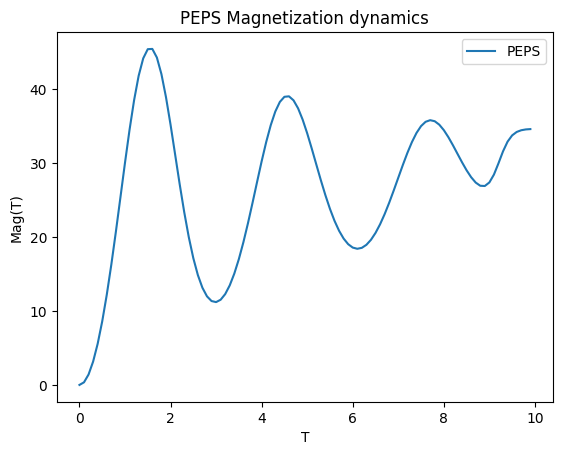

In [57]:
## plot total mag dynamics
total_mag_peps_RT = []
for i in range(len(E_list_peps_RT)):
    mag = np.sum(mz_list_peps_RT[i])
    total_mag_peps_RT.append(mag)

pyplot.title("PEPS Magnetization dynamics")
pyplot.plot(T_list_peps_RT,total_mag_peps_RT,"-", label="PEPS")
pyplot.xlabel("T")
pyplot.ylabel("Mag(T)")
pyplot.legend()
pyplot.show()


# Important notice for PEPS simulation
The code used in this notebook uses the mean-field environment to calculate physical quantities. The mean-field environment is an approximation where we neglect loop structures in the tensor network, and then the result becomes similar to that of a model on a tree (Bethe lattice). To improve the calculation of physical quantities, we have to consider the (approximate) contraction of the full tensor networ, such as CTMRG.  

Similarly to the mean-field environment, the simple-update method uses a local optimization. In the simple update, the approximation (trucntion) due to a finite bond-dimesion is not accurate, and therefore the state is fully optimized for the given bond-dimension.